In [1]:
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

mpl.rc("figure", dpi=150)
mpl.rc("figure", figsize=(4,4))

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'xtick.labelsize':15,
    'ytick.labelsize':15,
    'axes.labelsize':20,
})

import os

# Fijando la partícula

## Ladd

### Partícula

In [2]:
ladd_dir = '../data.lbm/fixedParticle/ladd/'
ladd_particleDf = pd.read_csv(ladd_dir+"particlesTrj.csv")
ladd_particleDf

,tick,time,particleId,position_x,position_y,velocity_x,velocity_y,angularVelocity
0,0,0.0,1,0.0,0.0,0.0,0.0,0.000000e+00
1,10,0.2,1,0.0,0.0,0.0,0.0,1.477933e-17
2,20,0.4,1,0.0,0.0,0.0,0.0,2.955865e-17
3,30,0.6,1,0.0,0.0,0.0,0.0,4.433798e-17
4,40,0.8,1,0.0,0.0,0.0,0.0,5.911731e-17
...,...,...,...,...,...,...,...,...
896,8970,179.4,1,0.0,0.0,0.0,0.0,-5.425866e-03
897,8980,179.6,1,0.0,0.0,0.0,0.0,-5.425771e-03
898,8990,179.8,1,0.0,0.0,0.0,0.0,-5.425651e-03
899,9000,180.0,1,0.0,0.0,0.0,0.0,-5.425525e-03


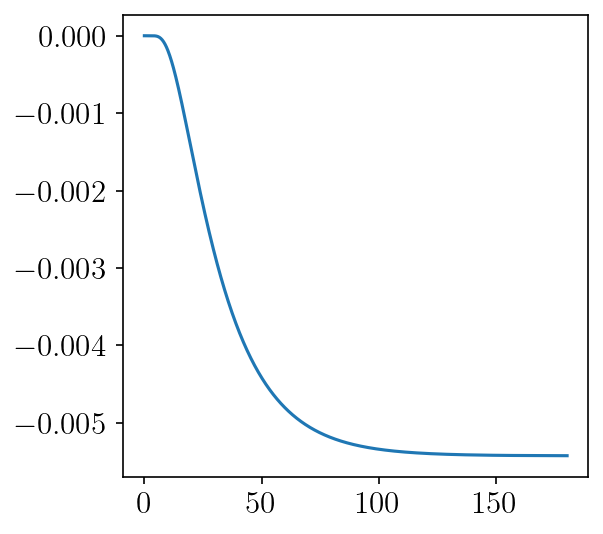

In [3]:
plt.plot(ladd_particleDf.time, ladd_particleDf.angularVelocity)

### Fluido

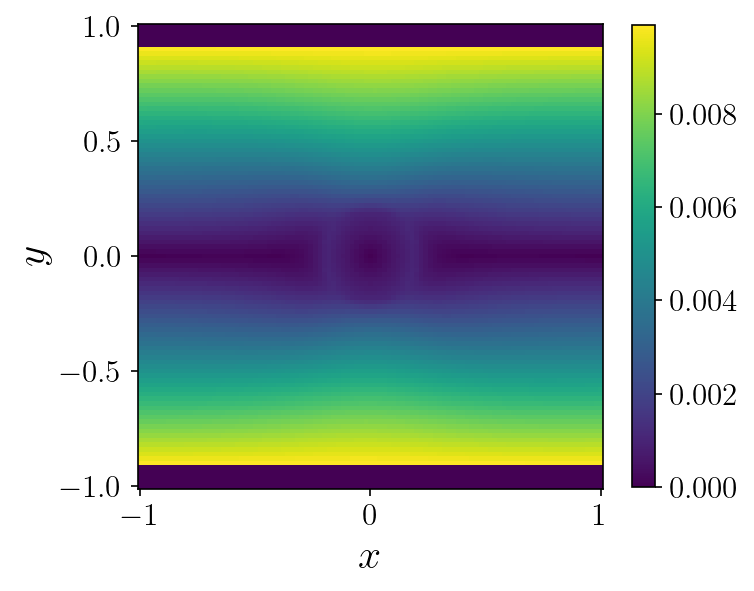

In [4]:
ladd_tick = ladd_particleDf.tick.values[-1]
ladd_fluidDf = pd.read_csv(ladd_dir + f"fluidTrj_{ladd_tick}.csv").set_index(["id_x","id_y"]).sort_index()

fig, ax = plt.subplots(figsize = (5,5))

# Create a meshgrid for plotting
x_unique = ladd_fluidDf['coordinate_x'].unique()
y_unique = ladd_fluidDf['coordinate_y'].unique()
X, Y = np.meshgrid(x_unique, y_unique)

c = ax.pcolormesh(
    X, Y,
    np.sqrt(ladd_fluidDf.fluidVelocity_x**2 + ladd_fluidDf.fluidVelocity_y**2).unstack().values.transpose(),
    cmap = "viridis"
)

ax.set_aspect('equal')

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

fig.colorbar(c, ax=ax, shrink=.8)  # 'shrink' adjusts the size, 'aspect' adjusts width


plt.show()

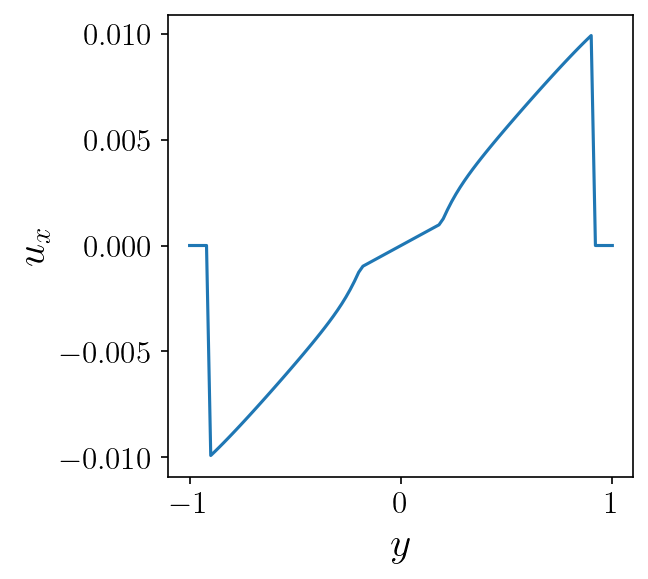

In [5]:
# encuentro el primer id_x tal que coordinate_x sea mayor o igual a cero
ladd_id = ladd_fluidDf.query("coordinate_x >= 0").reset_index().iloc[0].filter(["id_x"]).values[0]

ladd_v_x = ladd_fluidDf.loc[ladd_id].filter(["coordinate_y", "fluidVelocity_x"])

plt.plot(ladd_v_x.coordinate_y, ladd_v_x.fluidVelocity_x) 
plt.xlabel("$y$")
plt.ylabel("$u_x$")

plt.show()

## PSM

### Partícula

In [6]:
psm_dir = '../data.lbm/fixedParticle/psm/'
psm_particleDf = pd.read_csv(psm_dir+"particlesTrj.csv")
psm_particleDf

,tick,time,particleId,position_x,position_y,velocity_x,velocity_y,angularVelocity
0,0,0.0,1,0.0,0.0,0.0,0.0,0.000000e+00
1,10,0.2,1,0.0,0.0,0.0,0.0,2.781247e-33
2,20,0.4,1,0.0,0.0,0.0,0.0,-4.329304e-33
3,30,0.6,1,0.0,0.0,0.0,0.0,-6.732871e-33
4,40,0.8,1,0.0,0.0,0.0,0.0,-7.734357e-33
...,...,...,...,...,...,...,...,...
896,8970,179.4,1,0.0,0.0,0.0,0.0,-5.424673e-03
897,8980,179.6,1,0.0,0.0,0.0,0.0,-5.424688e-03
898,8990,179.8,1,0.0,0.0,0.0,0.0,-5.424682e-03
899,9000,180.0,1,0.0,0.0,0.0,0.0,-5.424657e-03


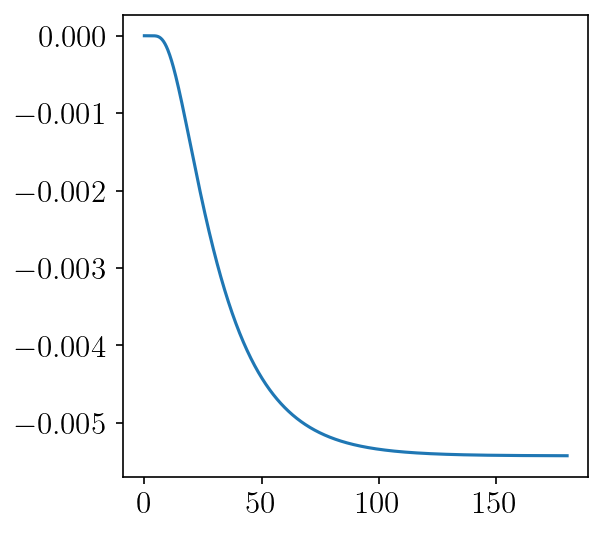

In [7]:
plt.plot(psm_particleDf.time, psm_particleDf.angularVelocity)

### Fluido

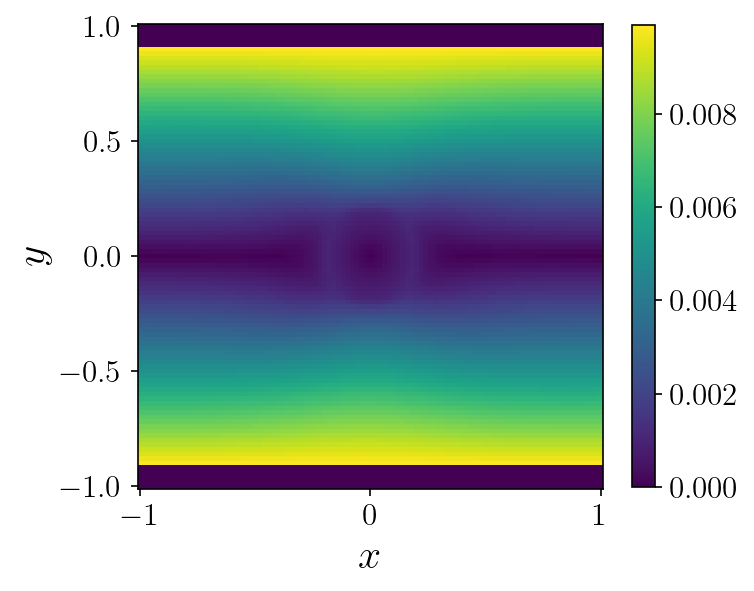

In [8]:
psm_tick = psm_particleDf.tick.values[-1]
psm_fluidDf = pd.read_csv(psm_dir + f"fluidTrj_{psm_tick}.csv").set_index(["id_x","id_y"]).sort_index()

fig, ax = plt.subplots(figsize = (5,5))

# Create a meshgrid for plotting
x_unique = psm_fluidDf['coordinate_x'].unique()
y_unique = psm_fluidDf['coordinate_y'].unique()
X, Y = np.meshgrid(x_unique, y_unique)

c = ax.pcolormesh(
    X, Y,
    np.sqrt(psm_fluidDf.fluidVelocity_x**2 + psm_fluidDf.fluidVelocity_y**2).unstack().values.transpose(),
    cmap = "viridis"
)

ax.set_aspect('equal')

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

fig.colorbar(c, ax=ax, shrink=.8)  # 'shrink' adjusts the size, 'aspect' adjusts width


plt.show()

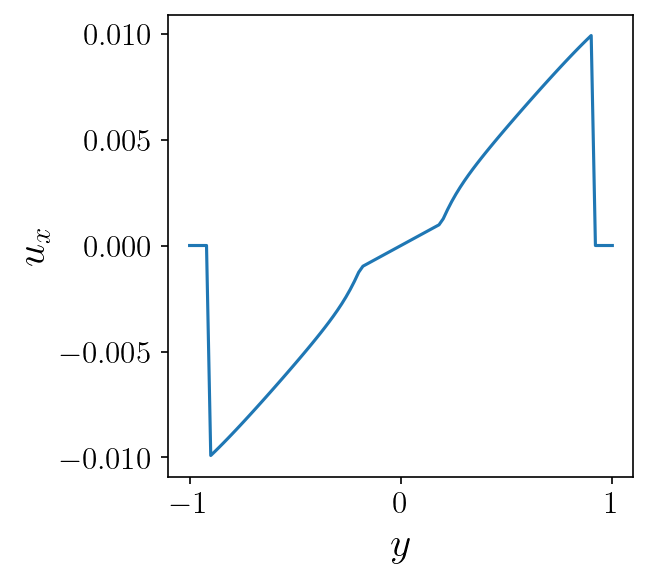

In [9]:
# encuentro el primer id_x tal que coordinate_x sea mayor o igual a cero
psm_id = psm_fluidDf.query("coordinate_x >= 0").reset_index().iloc[0].filter(["id_x"]).values[0]

psm_v_x = psm_fluidDf.loc[psm_id].filter(["coordinate_y", "fluidVelocity_x"])

plt.plot(psm_v_x.coordinate_y, psm_v_x.fluidVelocity_x) 
plt.xlabel("$y$")
plt.ylabel("$u_x$")

plt.show()